In [1]:
#WORKING
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from numpy import asarray as ar,exp
import seaborn as sns
import pandas as pd
import spectral
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import concurrent.futures
import multiprocessing as mp
from lib_hyperspec import *

/home/royabhinav/.local/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(3, 2592, 4608)


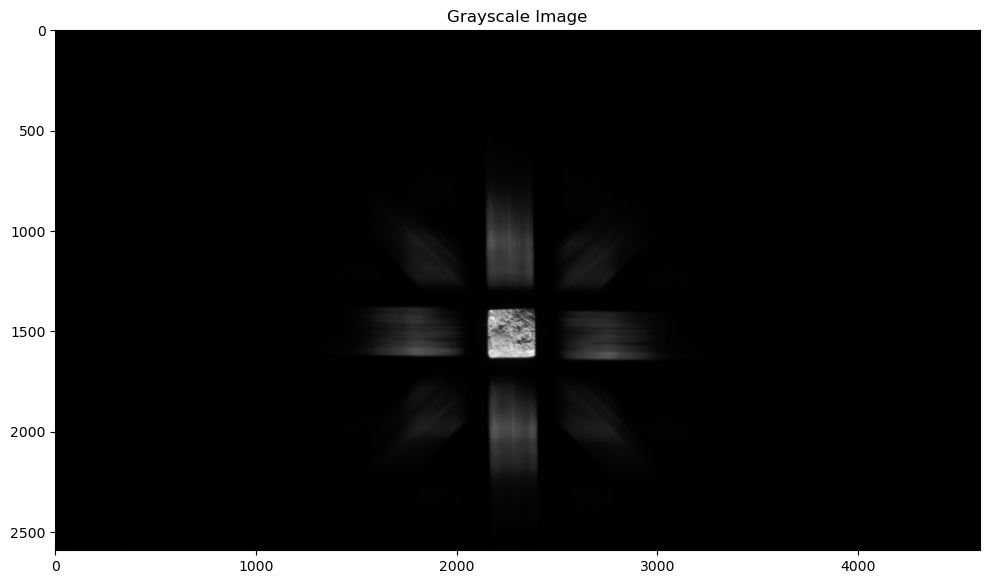

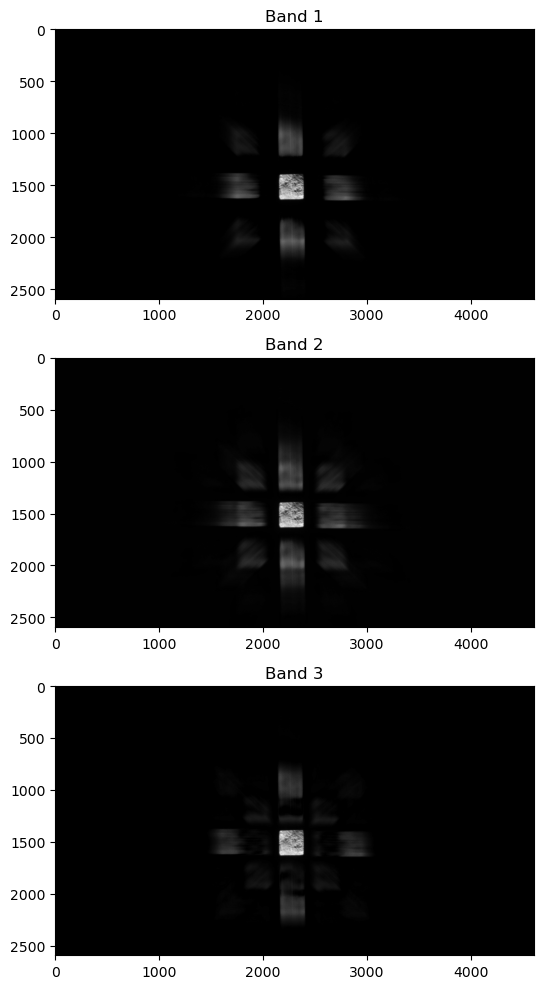

In [2]:
#IMAGE PLOTTING
filename = 'jan24sam3'
path_to_file = f'/home/royabhinav/Desktop/CTIS/Data/data_jan24'
img_path  = path_to_file+'/'+filename+'.tif'

# Open the file
with rasterio.open(img_path) as src:
    # Read the .tif image file as a 2D array
    image = src.read()

df = pd.read_csv("/home/royabhinav/Desktop/CTIS/calibrations.csv")

print(image.shape)

plot_img(image)

In [3]:
#print(df.head())
calibration_left, calibration_right, calibration_top, calibration_bottom = df['calibration_left'].values, df['calibration_right'].values, df['calibration_top'].values, df['calibration_bottom'].values

print(calibration_left, calibration_right, calibration_top, calibration_bottom)

[-1.35563358e-03  3.69749072e+00 -1.59005398e+03] [-1.39157969e-03  8.78584299e+00 -1.29488539e+04] [-1.66836667e-03  2.37480613e+00  4.24263959e+01] [-1.35563358e-03  6.56465550e+00 -7.01616332e+03]


Base points:  [2014.2030116  1542.45398607 2433.22906597 2119.42241032 3013.34951907
 2548.58133432]


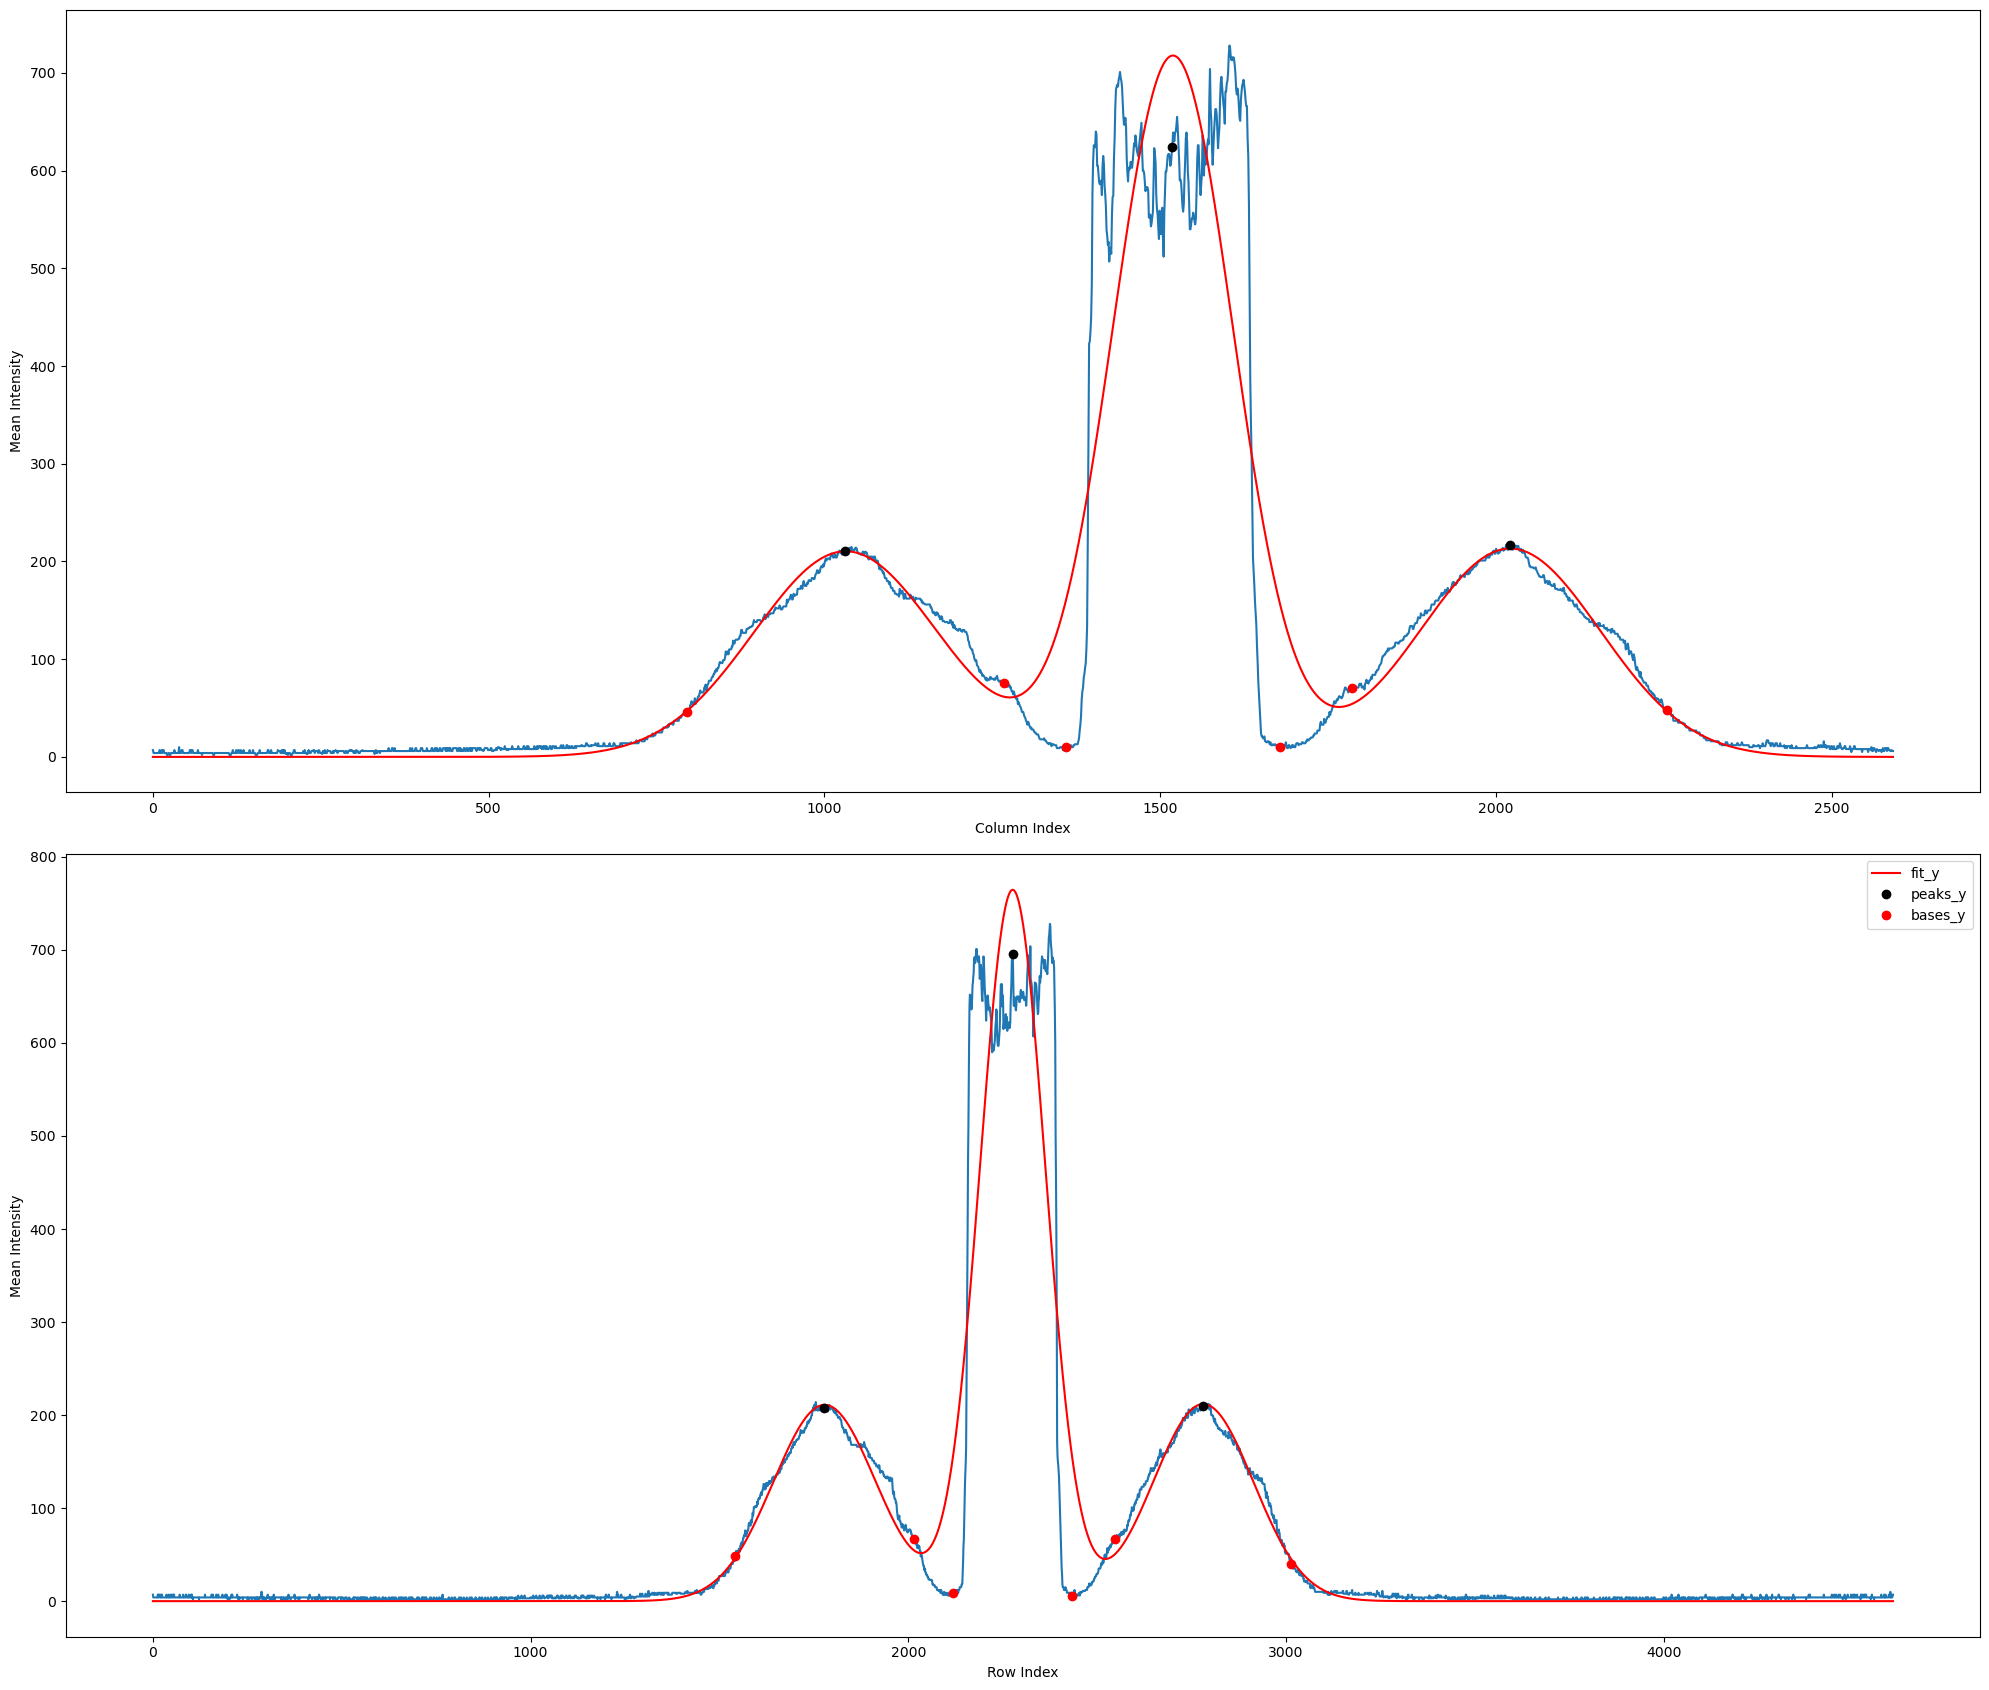

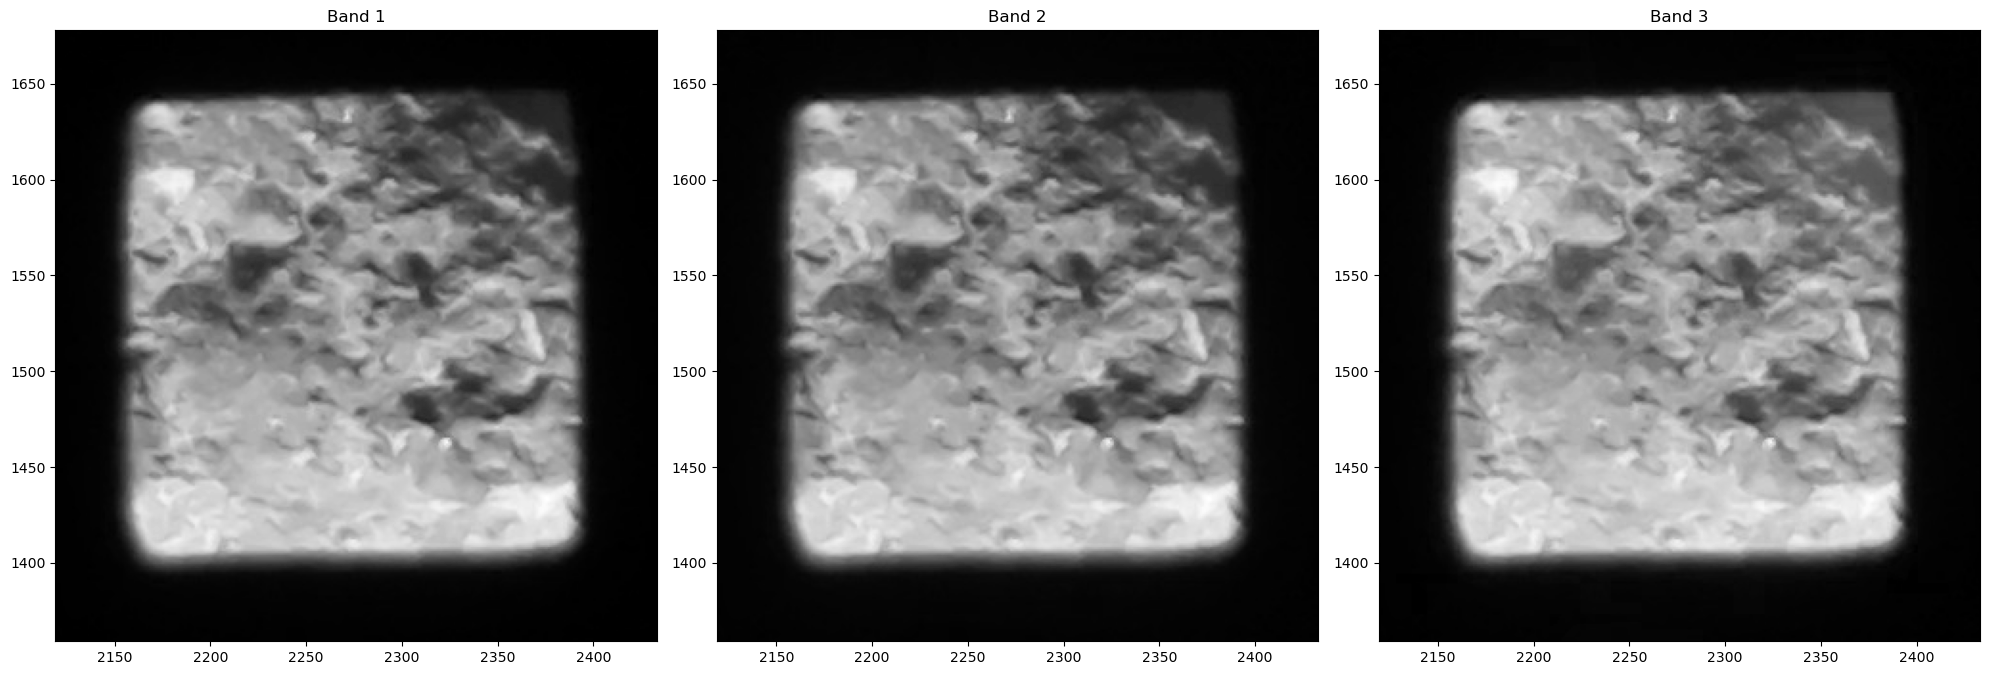

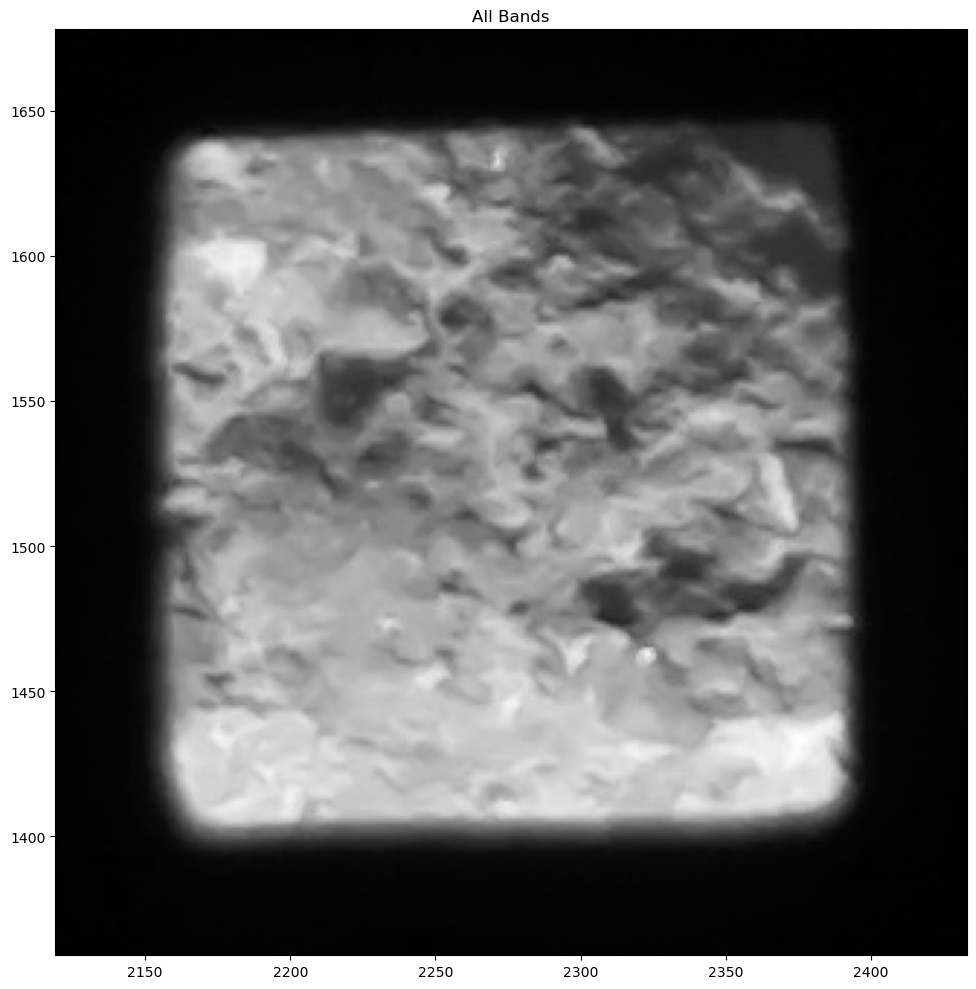

In [4]:
#EXTRACTING IMAGE REGIONS

# Initial guess for the parameters
initial_guess_col = [30, 1000, 50, 100, 1500, 50, 30, 2000, 50]

# Initial guess for the parameters
initial_guess_row = [30, 1700, 100, 150, 2200, 100, 30, 2700, 100]

# Extract the regions
region_1, region_2, region_3, region_4, central_region = get_regions(image, initial_guess_col, initial_guess_row)

center_y, center_x = plot_region_3(central_region, image)

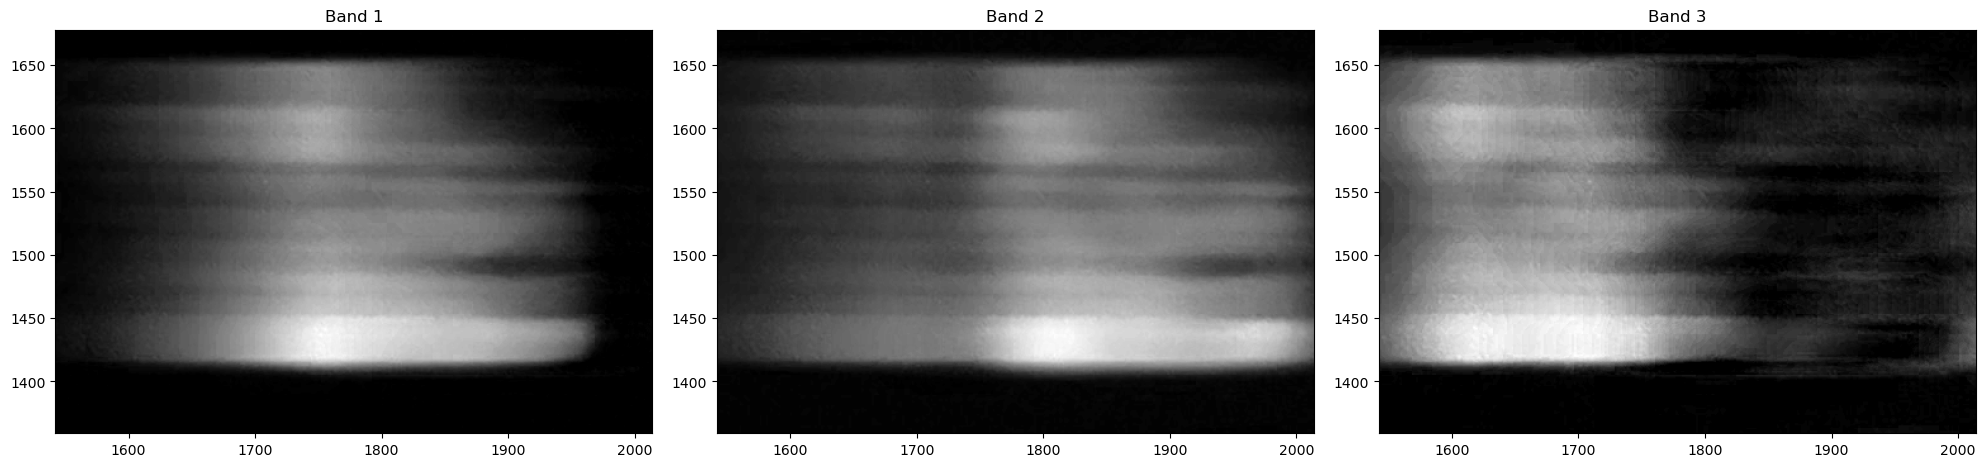

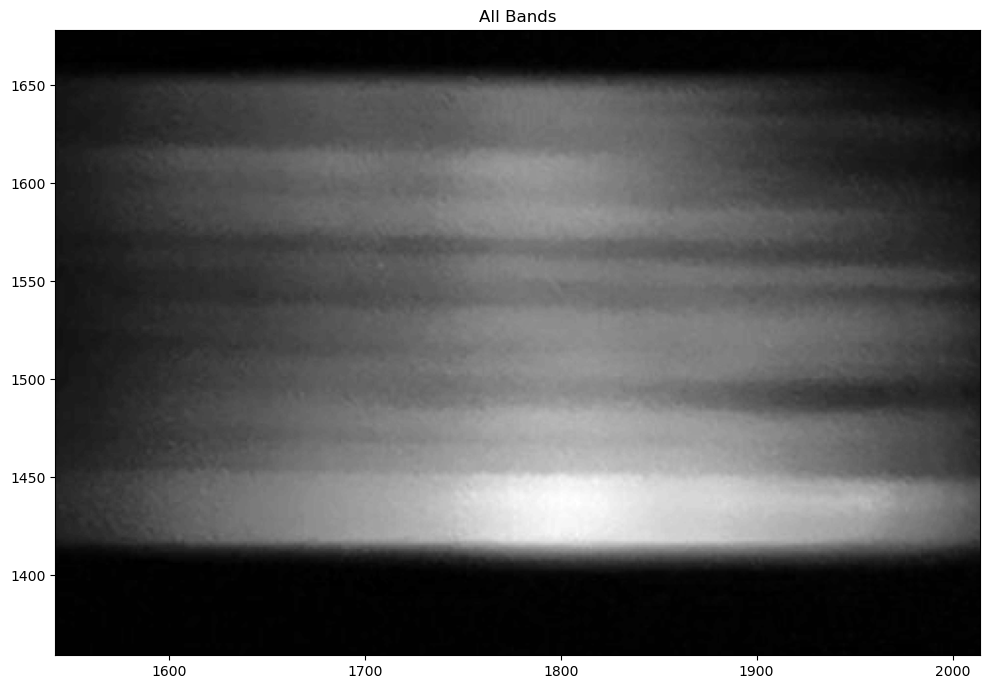

In [5]:
plot_region_1(region_1, image, plot_peak=False)


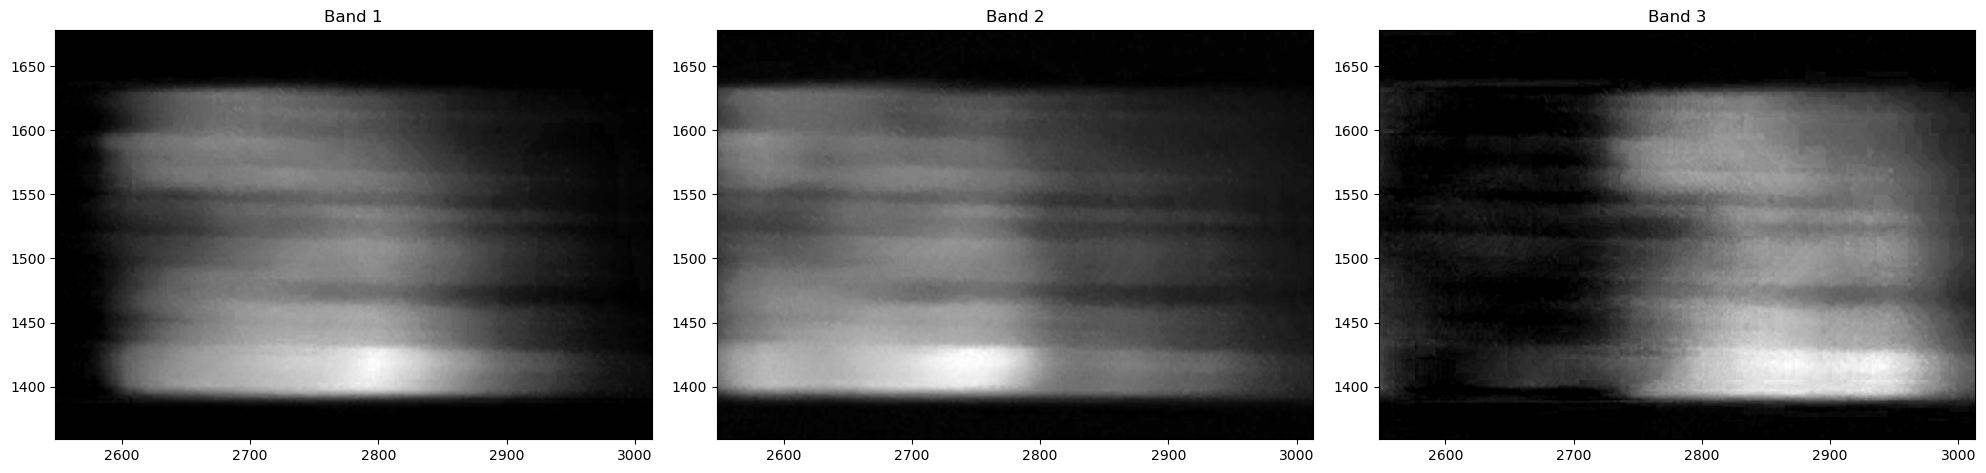

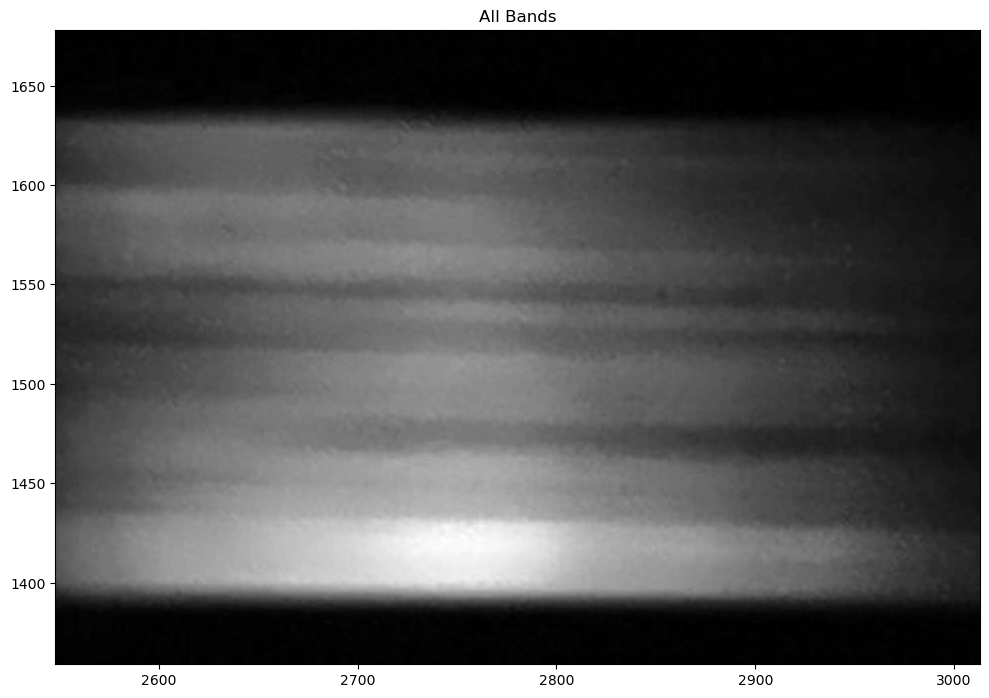

In [6]:
plot_region_1(region_2, image, plot_peak=False)

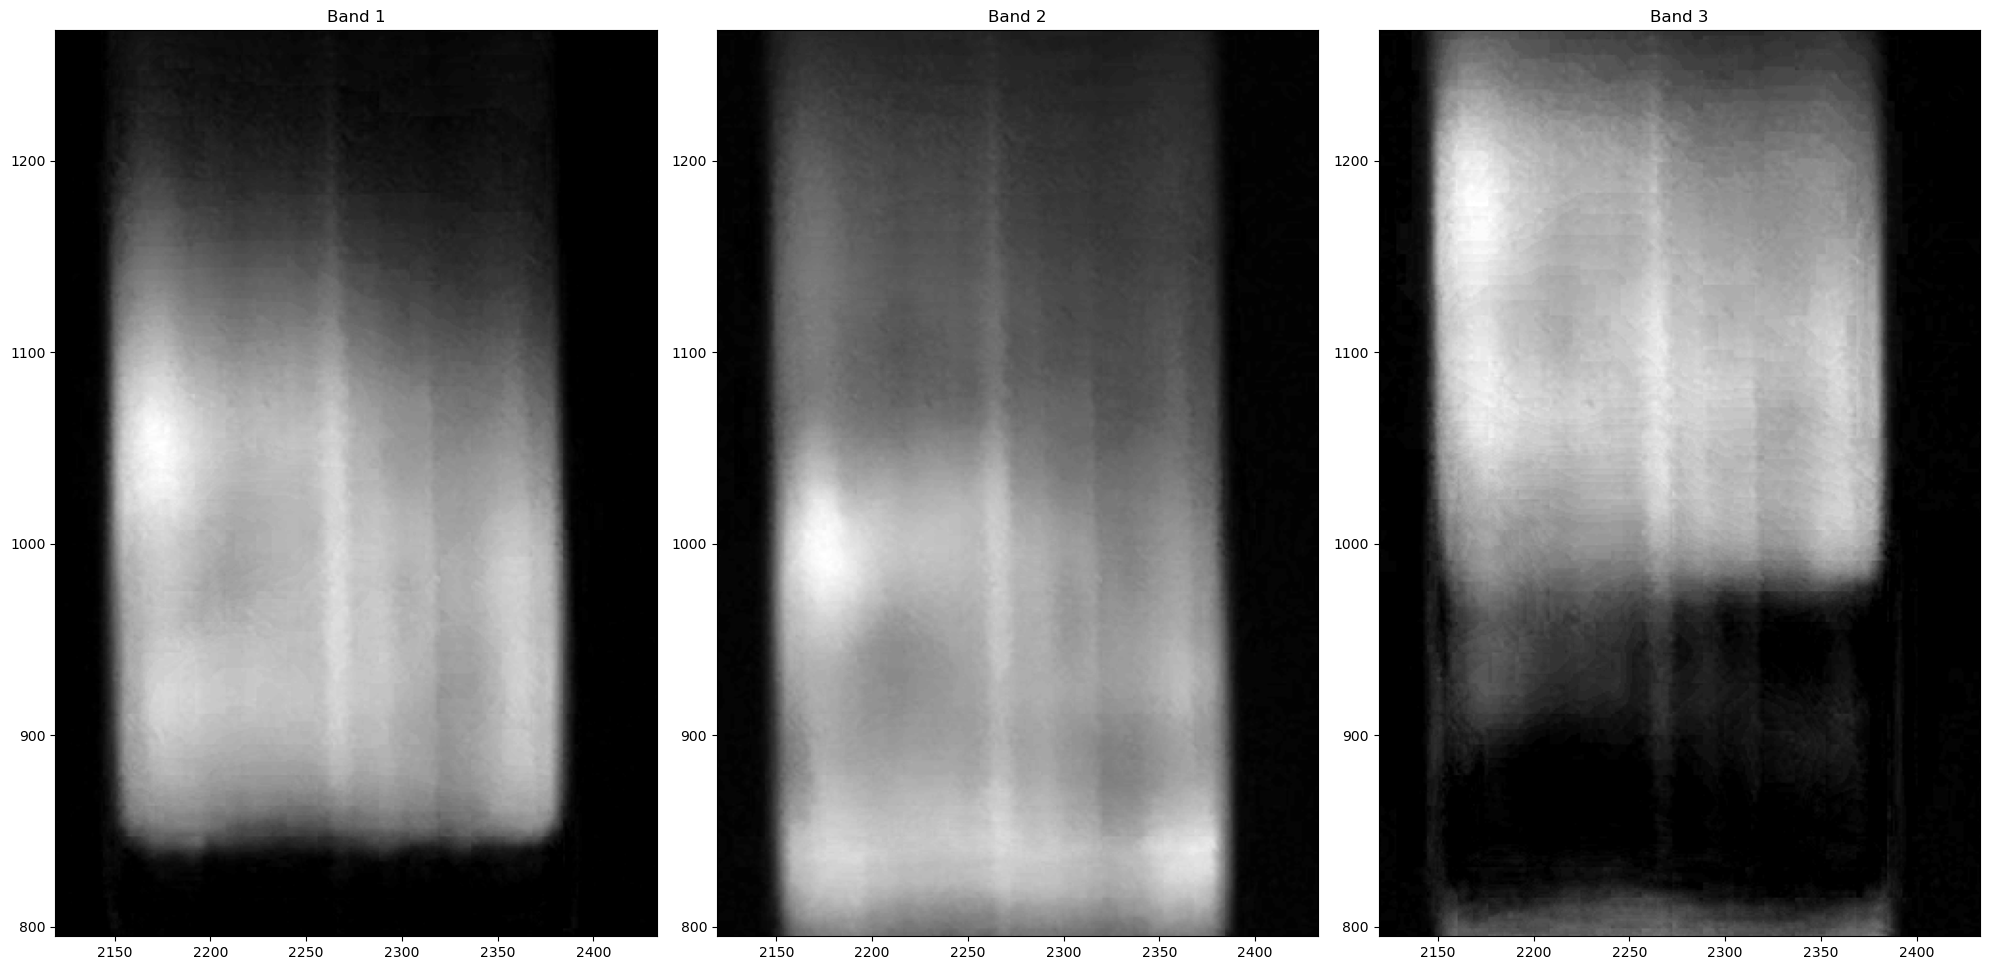

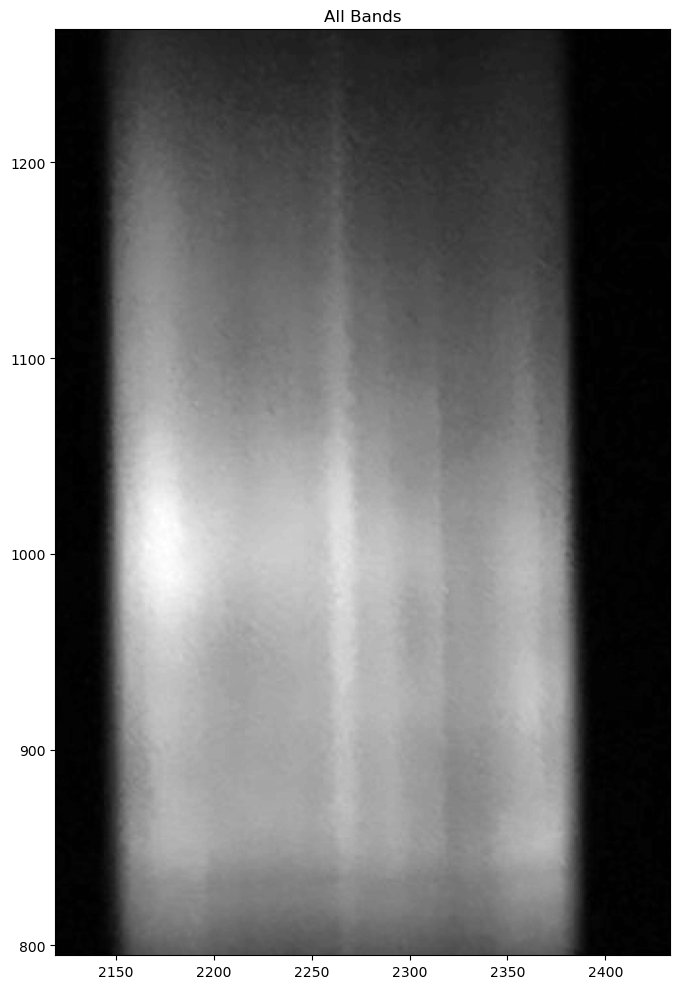

In [7]:
plot_region_2(region_3, image, plot_peak=False)


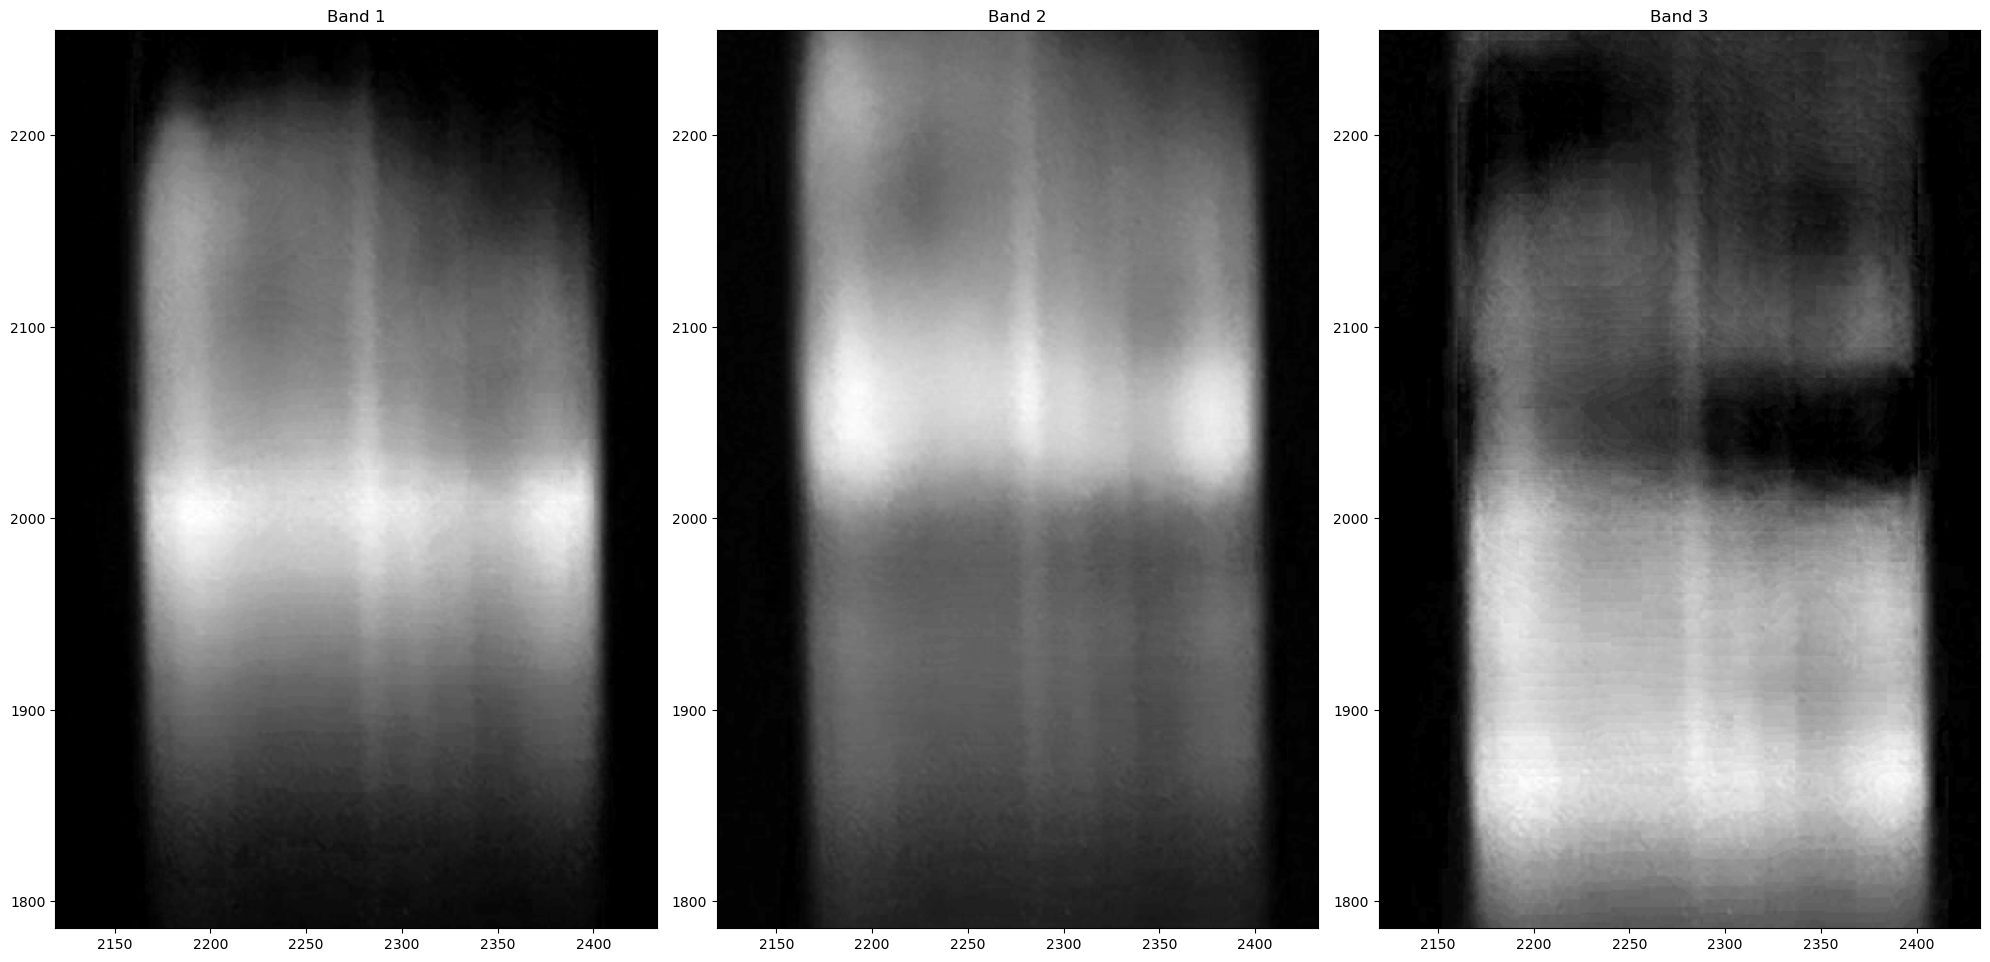

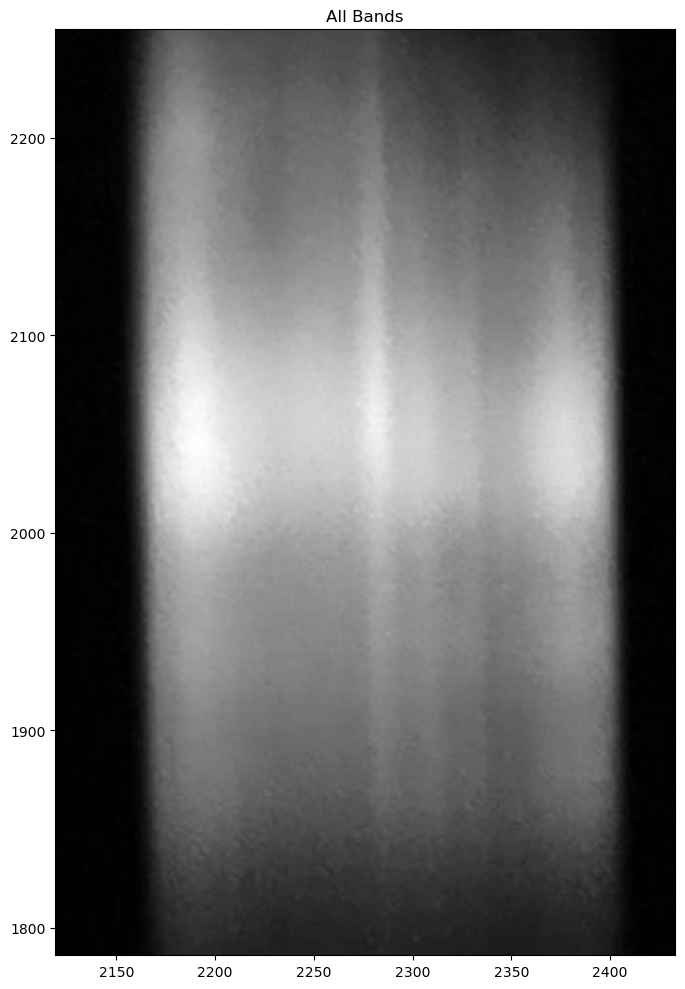

In [8]:
plot_region_2(region_4, image, plot_peak=False)

In [9]:
#USING THE CALIBRATION FORMULA TO GENERATE THE SPECTRA CUBE

# Generate the spectra cube
cube, new_wavelengths = spectra_cube(image, central_region, region_1, region_2, region_3, region_4, calibration_left, calibration_right, calibration_top, calibration_bottom)

np.save(f'{path_to_file}/{filename}_cube.npy', cube)
np.save(f'{path_to_file}/{filename}_wavelengths.npy', new_wavelengths)



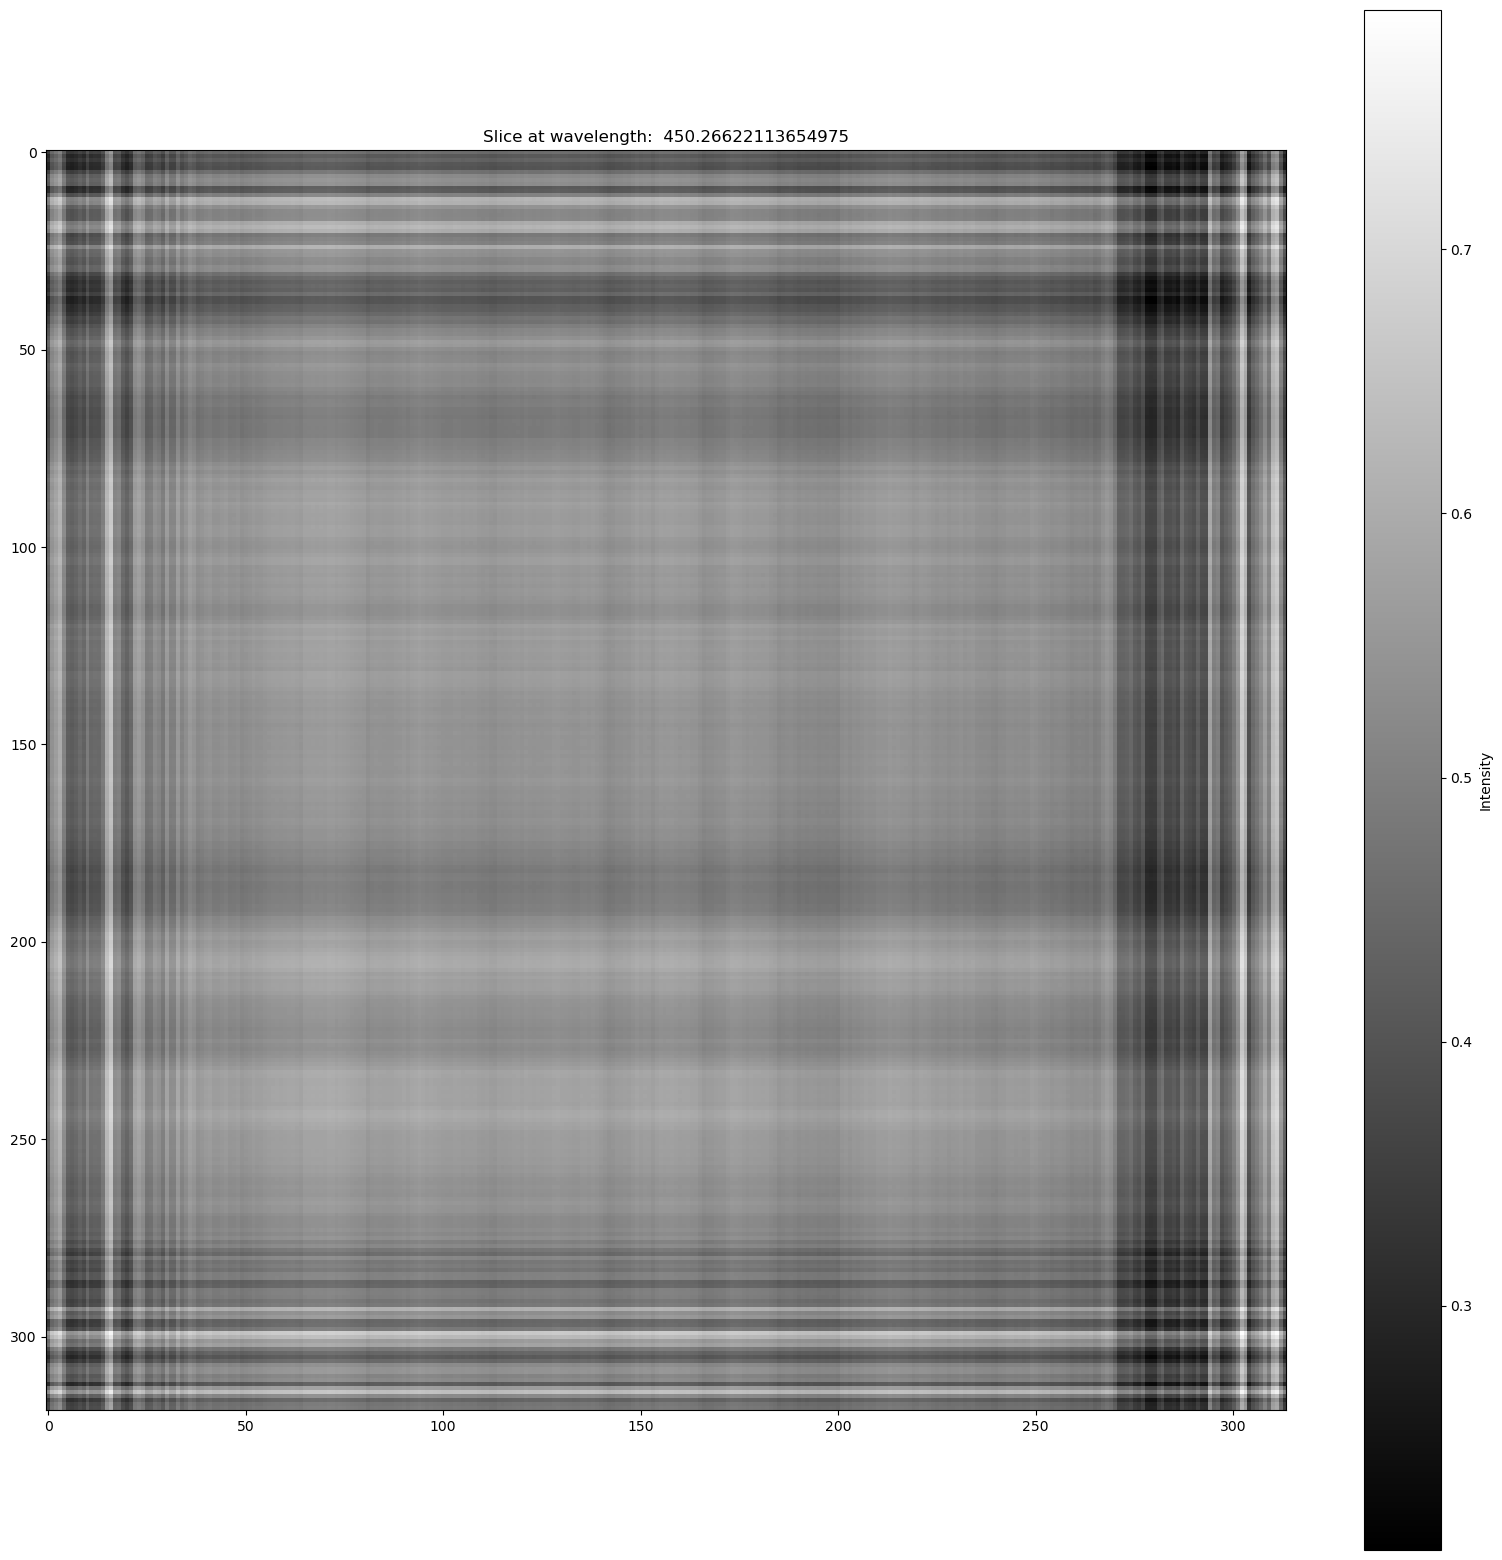

(319, 314, 1000)


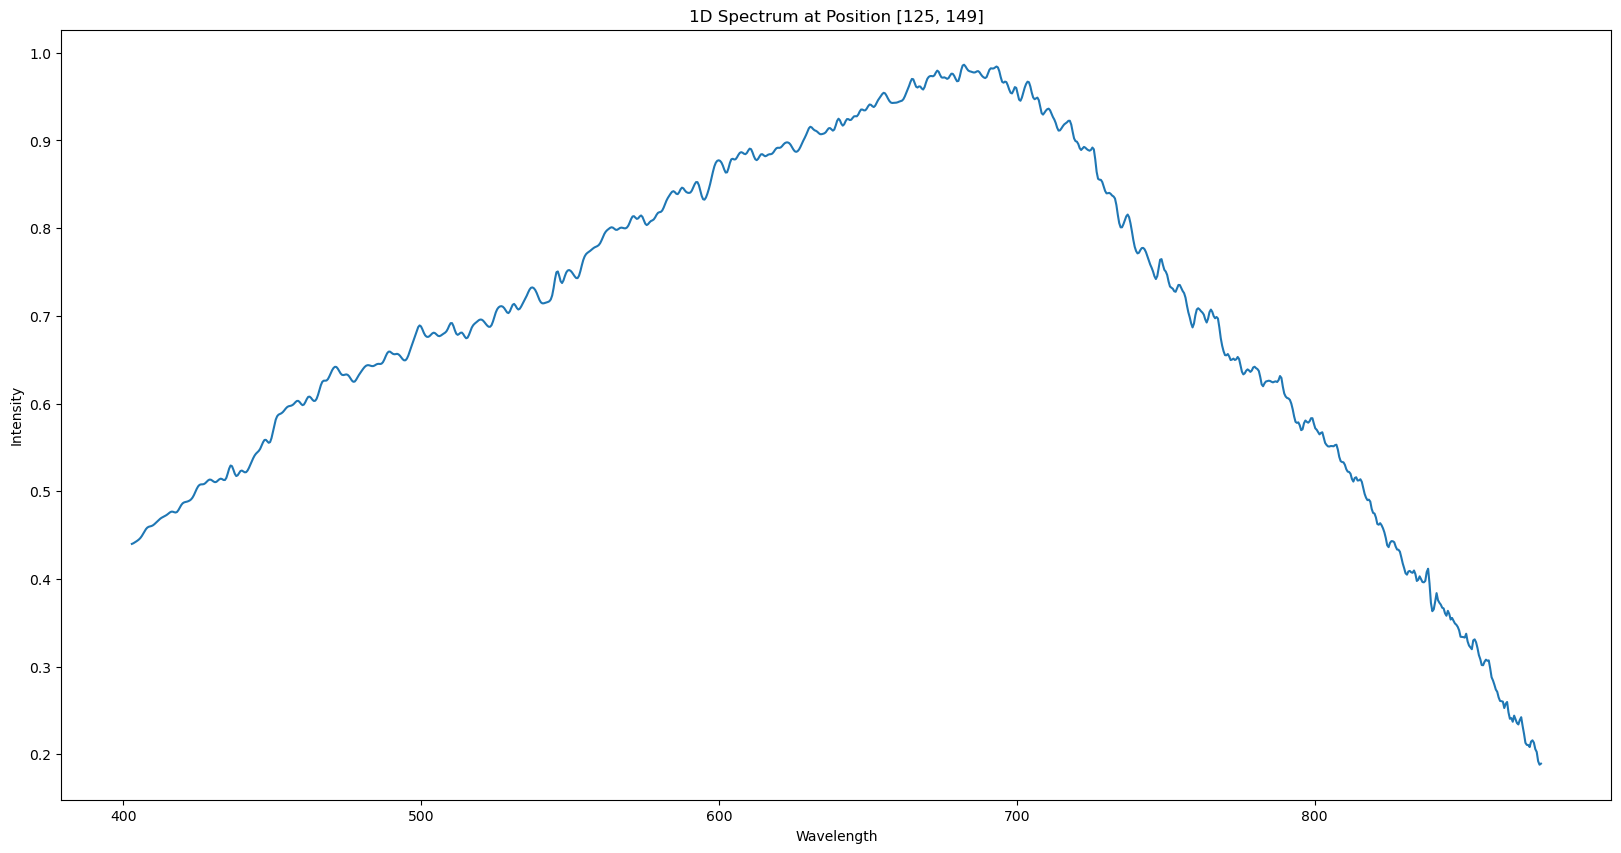

In [11]:
cube = np.load(f'{path_to_file}/{filename}_cube.npy')
new_wavelengths = np.load(f'{path_to_file}/{filename}_wavelengths.npy')
# Select a specific wavelength to visualize
wavelength_index = 100
slice_2d = cube[:, :, wavelength_index]

# Visualize the 2D slice
plt.figure(figsize=(20, 20))
plt.imshow(slice_2d, cmap='gray')
plt.colorbar(label='Intensity')
plt.title(f'Slice at wavelength:  {new_wavelengths[wavelength_index]}')
plt.show()

print(cube.shape)

pos = [125, 149]

spec_1d = cube[pos[0], pos[1], :]

plt.figure(figsize=(20, 10))
# Plot the 1D spectrum
plt.plot(new_wavelengths, spec_1d)
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('1D Spectrum at Position {}'.format(pos))
plt.show()
